##### Copyright 2026 Google LLC.

In [ ]:
# @title Licensed under the Apache License, Version 2.0 (the "License");
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Gemini API: Getting started with Interactions API

<a target="_blank" href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Get_started_interactions_api.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" height=30/></a>

The [Interactions API](https://ai.google.dev/gemini-api/docs/interactions?ua=chat) is a unified interface for building with Gemini models and agents. It simplifies the development of agentic applications by handling server-side state management, tool orchestration, and long-running tasks.

With a single endpoint, you can:

- Interact with Gemini models for text, image, and audio generation
- Build multi-turn conversations without managing history client-side
- Call custom functions and built-in tools like Google Search
- Run specialized agents like Deep Research for complex tasks

<a name="setup"></a>
## Setup

### Install SDK

Install the SDK from [PyPI](https://github.com/googleapis/python-genai). It's recommended to always use the latest version.

In [ ]:
%pip install -U -q 'google-genai>=1.55.0' # 1.55 for Interactions API

### Setup your API key

To run the following cell, your API key must be stored it in a Colab Secret named `GEMINI_API_KEY`. If you don't already have an API key or you aren't sure how to create a Colab Secret, see [Authentication ![image](https://storage.googleapis.com/generativeai-downloads/images/colab_icon16.png)](../quickstarts/Authentication.ipynb) for an example.

In [ ]:
from google.colab import userdata

GEMINI_API_KEY = userdata.get('GEMINI_API_KEY')

### Initialize SDK client

With the new SDK, now you only need to initialize a client with you API key.

In [ ]:
from google import genai
from google.genai import types

client = genai.Client(api_key=GEMINI_API_KEY)

### Choose a model

Select the model you want to use in this guide. You can either select one from the list or enter a model name manually. 

For a full overview of all Gemini models, check the [documentation](https://ai.google.dev/gemini-api/docs/models/gemini).

In [ ]:
MODEL_ID = "gemini-3-flash-preview" # @param ["gemini-2.5-flash-lite", "gemini-2.5-flash", "gemini-2.5-pro", "gemini-3-flash-preview", "gemini-3.1-pro-preview"] {"allow-input":true, isTemplate: true}

## Create an interaction

At its simplest, the Interactions API works like a standard chat completion. You provide a model and an input string. By default, interactions are stored (`store=True`), allowing you to reference them later.

In [1]:
interaction = client.interactions.create(
    model=MODEL_ID,
    system_instruction="You are a helpful assistant.",
    input="Explain quantum entanglement in one sentence."
)

print(interaction.outputs[-1].text)

/tmp/ipykernel_2276898/4284843731.py:5: UserWarning: Interactions usage is experimental and may change in future versions.
  interaction = client.interactions.create(


Quantum entanglement is a phenomenon where two or more particles become so deeply linked that the state of one instantly determines the state of the other, regardless of the distance separating them.


## Stateful Multi-turn Conversations

One of the most powerful features of this API is **server-side state management**. You do not need to append messages to a list and send the full history back to the server every time.

Use `previous_interaction_id` to continue a conversation.

Note: Only conversation history is preserved. Parameters like `tools` or `generation_config` are interaction-scoped and must be re-declared if needed.

In [2]:
turn_1 = client.interactions.create(
    model=MODEL_ID,
    input="My name is Alice and I am a software engineer."
)
print(f"Turn 1 ID: {turn_1.id}")

turn_2 = client.interactions.create(
    model=MODEL_ID,
    input="What is my job?",
    previous_interaction_id=turn_1.id
)

print(turn_2.outputs[-1].text)

Turn 1 ID: v1_ChdDekJ5YVktZ0VlYUx4czBQczl5VDRRVRIXQ3pCeWFZLWdFZWFMeHMwUHM5eVQ0UVU
You mentioned that you are a **software engineer**!


For client-managed history, see
[Stateless conversations](/gemini-api/docs/interactions#stateless-conversation).

### Forking Conversations
Because state is managed by ID, you can "fork" a conversation by referencing an older interaction ID with a different prompt.

In [3]:
# Branch off from Turn 1 with a different topic
turn_2_fork = client.interactions.create(
    model=MODEL_ID,
    input="What is my name?",
    previous_interaction_id=turn_1.id
)

print(turn_2_fork.outputs[-1].text)

Your name is **Alice**. You also mentioned that you are a software engineer! How can I help you with your work or anything else today?


## Multimodal Interactions

Gemini models natively understand and generate multiple content types. You can pass text, images, audio, or PDF documents in a single interaction. This example uses a remote image URL.

### Multimodal understanding

In [4]:
interaction = client.interactions.create(
    model=MODEL_ID,
    input=[
        {"type": "text", "text": "Generate a recipe for the shown scones."},
        {
            "type": "image", 
            "uri": "https://storage.googleapis.com/generativeai-downloads/images/scones.jpg"
        }
    ],
)

print(interaction.outputs[-1].text)

Based on the image, these are **Rustic Blueberry Drop Scones**. They have a tender, buttery interior, are bursting with juicy blueberries, and feature a signature crunchy, sparkling sugar crust.

### **Rustic Blueberry Drop Scones**
*Yields: 8-10 scones*

---

### **Ingredients**

**The Dough:**
*   2 cups (250g) All-purpose flour
*   1/3 cup (65g) Granulated sugar
*   1 tablespoon Baking powder
*   ½ teaspoon Salt
*   ½ cup (115g) Unsalted butter, **very cold** and cubed
*   ¾ cup (180ml) Heavy cream (plus 1-2 tbsp extra if needed)
*   1 teaspoon Vanilla extract
*   1 ½ cups Fresh blueberries (frozen can be used, but do not thaw them)

**The Topping:**
*   2 tablespoons Heavy cream (for brushing)
*   2 tablespoons Coarse sugar (such as Turbinado or sparkling sanding sugar)

---

### **Instructions**

1.  **Prep:** Preheat your oven to **400°F (200°C)**. Line a large baking sheet with parchment paper.
2.  **Mix Dry Ingredients:** In a large bowl, whisk together the flour, granulated su

For audio, video, and document (PDF) understanding, see
[Multimodal understanding](https://ai.google.dev/gemini-api/docs/interactions?ua=chat#understanding).


### Multimodal Generation

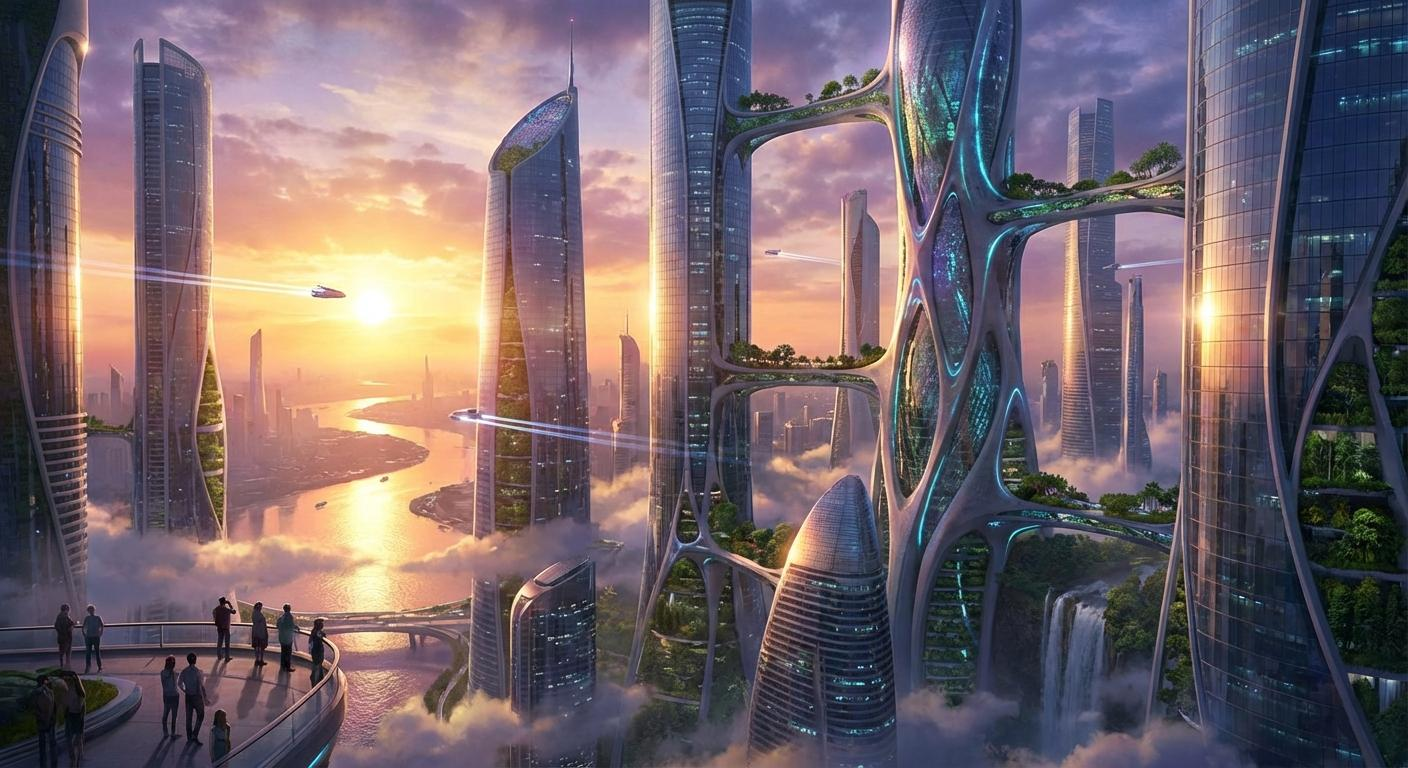

In [5]:
import base64
from IPython.display import Image

interaction = client.interactions.create(
    model="gemini-3-pro-image-preview",
    input="Generate an image of a futuristic city at sunset."
)

for output in interaction.outputs:
    if output.type == "image":
        with open("city.png", "wb") as f:
            f.write(base64.b64decode(output.data))

Image(filename='city.png')

For audio generation see [Multimodal generations](https://ai.google.dev/gemini-api/docs/interactions?ua=chat#generation).


## Tool use

Tools extend the model's capabilities by letting it call external functions or
services. The API includes ready-to-use tools, like Google Search or lets you define custom tools as JSON schema. The model decides when to call them based on the conversation:

### Built-in tools

In [7]:
interaction = client.interactions.create(
    model=MODEL_ID,
    input="Who won the 2024 Nobel Prize in Physics?",
    tools=[{"type": "google_search"}]
)

text_output = next((output for output in interaction.outputs if output.type == "text"), None)
if text_output:
    print(text_output.text)

The **2024 Nobel Prize in Physics** was awarded to **John J. Hopfield** and **Geoffrey E. Hinton** for their foundational discoveries and inventions that enable machine learning with artificial neural networks.

The Royal Swedish Academy of Sciences recognized the two scientists for using tools from physics to develop methods that serve as the bedrock of today’s powerful machine learning and artificial intelligence.

### The Laureates and Their Contributions:
*   **John J. Hopfield (Princeton University):** He invented the **Hopfield network**, a type of artificial neural network that can store and reconstruct images and other types of patterns in data. It uses principles of physics, specifically the concept of "energy" in magnetic systems, to find the most likely saved pattern even when presented with incomplete or distorted information.
*   **Geoffrey E. Hinton (University of Toronto):** Often called the "Godfather of AI," he used the Hopfield network as a foundation to create the **

Other built-in tools include [Code Execution](https://ai.google.dev/gemini-api/docs/interactions?ua=chat#tools-and-function-calling) and [Computer Use](https://ai.google.dev/gemini-api/docs/interactions?ua=chat#tools-and-function-calling).


### Function calling

In [8]:
# Define a tool
weather_tool = {
    "type": "function",
    "name": "get_weather",
    "description": "Get current weather for a location",
    "parameters": {
        "type": "object",
        "properties": {
            "location": {"type": "string", "description": "City name"}
        },
        "required": ["location"]
    }
}

# Send request with tool
interaction = client.interactions.create(
    model=MODEL_ID,
    input="What's the weather in Tokyo?",
    tools=[weather_tool]
)

# Handle tool call
for output in interaction.outputs:
    if output.type == "function_call":
        # Execute your function (mocked here)
        # result = get_weather(output.arguments)
        result = {"temperature": "22°C", "condition": "sunny"}

        # Return result to model
        interaction = client.interactions.create(
            model=MODEL_ID,
            previous_interaction_id=interaction.id,
            input={
                "type": "function_result",
                "name": output.name,
                "call_id": output.id,
                "result": result
            }
        )
        print(interaction.outputs[-1].text)

The current weather in Tokyo is sunny with a temperature of 22°C.


For code execution, URL context, and MCP servers, see
[Agentic capabilities](https://ai.google.dev/gemini-api/docs/interactions?ua=chat#tools-and-function-calling).

## Agents & Long-Running Tasks

Beyond models, the Interactions API provides access to specialized agents.
Deep Research executes multi-step research tasks, synthesizing information from
multiple sources into comprehensive reports.

Agents run asynchronously with `background=True`. Poll the interaction status
to retrieve results:

In [11]:
import time
agent_interaction = client.interactions.create(
    agent="deep-research-pro-preview-12-2025", # Note: use 'agent', not 'model'
    input="Research the history of the Google TPUs with a focus on 2025 specs.",
    background=True
)


# Poll for completion
while True:
    status_check = client.interactions.get(agent_interaction.id)
    print(f"Status: {status_check.status}")
    
    if status_check.status == "completed":
        print("\n--- Final Report ---\n")
        print(status_check.outputs[-1].text)
        break
    elif status_check.status in ["failed", "cancelled"]:
        print("Agent failed.")
        break
        
    time.sleep(10)

Status: in_progress
Status: in_progress
Status: in_progress
Status: in_progress
Status: in_progress
Status: in_progress
Status: in_progress
Status: in_progress
Status: in_progress
Status: in_progress
Status: in_progress
Status: in_progress
Status: in_progress
Status: in_progress
Status: in_progress
Status: in_progress
Status: in_progress
Status: in_progress
Status: in_progress
Status: in_progress
Status: in_progress
Status: in_progress
Status: in_progress
Status: in_progress
Status: in_progress
Status: in_progress
Status: in_progress
Status: in_progress
Status: in_progress
Status: in_progress
Status: in_progress
Status: in_progress
Status: in_progress
Status: in_progress
Status: in_progress
Status: in_progress
Status: in_progress
Status: in_progress
Status: in_progress
Status: in_progress
Status: in_progress
Status: in_progress
Status: in_progress
Status: in_progress
Status: in_progress
Status: in_progress
Status: in_progress
Status: completed

--- Final Report ---

# Comprehensive His

For more details, see [Deep Research](https://ai.google.dev/gemini-api/docs/deep-research).

## Next Steps

The Interactions API supports many more complex workflows. Check the [API Reference](https://ai.google.dev/api/interactions-api) for details on:


*   **[Structured Outputs](https://ai.google.dev/gemini-api/docs/structured-output):** Force the model to return valid JSON matching a specific schema.
*   **[Streaming](https://ai.google.dev/gemini-api/docs/interactions#streaming):** Stream token responses for real-time applications.
*   **[Thinking Models](https://ai.google.dev/api/interactions-api#thinking):** Configure `thinking_level` for Gemini 2.5 and 3.0 models to handle complex reasoning.
*   **[Remote MCP](https://ai.google.dev/gemini-api/docs/interactions?ua=chat#remote-mcp-model-context-protocol):** Connect Gemini to your own private MCP servers.
*   **[Combining tools and structured outputs](https://ai.google.dev/gemini-api/docs/interactions?ua=chat#combining-tools-and-structured-output):** Combine tools and structured outputs to create more complex workflows.
*   **[File Uploads](https://ai.google.dev/gemini-api/docs/interactions?ua=chat#working-with-files):** Upload files to the model for processing.
*   **[Data Model](https://ai.google.dev/gemini-api/docs/interactions?ua=chat#data-model):** high level overview of the main inputs and outputs of the API.